### Load magic functions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load required packages

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

sns.set(context='notebook', style='darkgrid')

In [5]:
! ls ../output_data/

nse_500_company_info.csv


### Read companies info data

In [6]:
input_data_folder = '../modular_code/output_files/'

In [7]:
os.listdir(input_data_folder)

['all_companies_info_2019-10-18.csv', 'companies_info_2019-10-18.csv']

In [8]:
nse_500_info = pd.read_csv(os.path.join(input_data_folder, 'all_companies_info_2019-10-18.csv'))
nse_500_info.head()
nse_500_info.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0


(501, 10)

In [9]:
nse_500_info.isna().sum()

symbol                0
market_cap            3
current_price         3
book_value            3
stock_pe              3
dividend_yield        3
roce                  3
roe                   4
sales_growth_3yrs    15
face_value            3
dtype: int64

### Missing values

#### missing market cap values

In [11]:
missing_market_cap = nse_500_info.market_cap.isna()
nse_500_info.loc[missing_market_cap, :]

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
490,LAKSHVILAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,SPARC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,TATAMTRDVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### missing roe values

In [17]:
missing_roe = nse_500_info.roe.isna()
nse_500_info.loc[missing_roe, :]

# replace missing roe with 0
nse_500_info.loc[missing_roe, 'roe'] = 0

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
414,SUZLON,1330.0,2.5,-13.2,-1.0,0.0,-5.41,NaN,-24.64,2.0
490,LAKSHVILAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
495,SPARC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
497,TATAMTRDVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN


#### missing sales_growth values

In [13]:
missing_sales_growth = nse_500_info.sales_growth_3yrs.isna()
nse_500_info.loc[missing_sales_growth, :]

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
25,ARVINDFASN,2563.0,436.85,230.04,47.33,0.00,5.97,4.78,NaN,4.0
48,BANDHANBNK,67829.0,568.50,93.89,31.24,0.53,10.48,18.96,NaN,10.0
110,DALBHARAT,15579.0,807.35,392.83,167.51,0.25,1.37,1.17,NaN,2.0
137,FINEORG,5829.0,1901.00,165.84,45.06,0.37,40.95,28.14,NaN,5.0
203,ISEC,9113.0,282.90,32.11,19.43,3.32,53.06,52.02,NaN,5.0
226,INDOSTAR,1683.0,182.40,328.38,6.68,1.10,10.13,9.98,NaN,10.0
261,KPITTECH,2662.0,97.10,33.69,32.05,0.76,18.50,17.99,NaN,10.0
333,ORIENTELEC,3453.0,162.75,14.45,45.36,0.61,29.12,24.72,NaN,1.0
418,TCIEXP,2694.0,702.35,69.66,35.86,0.43,44.23,30.83,NaN,2.0
447,TIINDIA,6782.0,361.15,75.88,24.71,0.69,22.00,18.78,NaN,1.0


##### replace missing sales with 0

In [15]:
nse_500_info.loc[missing_sales_growth, 'sales_growth_3yrs'] = 0

In [18]:
nse_500_info.isna().sum()

symbol               0
market_cap           3
current_price        3
book_value           3
stock_pe             3
dividend_yield       3
roce                 3
roe                  0
sales_growth_3yrs    0
face_value           3
dtype: int64

#### Drop the missing values now

In [20]:
nse_500_info = nse_500_info.dropna(how='any')
nse_500_info.isna().sum()

symbol               0
market_cap           0
current_price        0
book_value           0
stock_pe             0
dividend_yield       0
roce                 0
roe                  0
sales_growth_3yrs    0
face_value           0
dtype: int64

In [22]:
print('Shape of data after dropping missing values', nse_500_info.shape)

Shape of data after dropping missing values (498, 10)


### Merge Industry column in data

In [23]:
nse_500_companies = pd.read_csv('../data/ind_nifty500list.csv')
nse_500_companies.columns = [c.lower().replace(' ', '_') for c in nse_500_companies.columns]
nse_500_companies.head()

,company_name,industry,symbol,series,isin_code
0,3M India Ltd.,SERVICES,3MINDIA,EQ,INE470A01017
1,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
2,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,AIAENG,EQ,INE212H01026
3,APL Apollo Tubes Ltd.,METALS,APLAPOLLO,EQ,INE702C01019
4,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017


In [24]:
nse_500_info.head()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0


In [25]:
companies_info = pd.merge(left=nse_500_info, right=nse_500_companies, 
                                    on='symbol',
                                   how='left'
                                  )
companies_info.shape
companies_info.head()

(498, 14)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,company_name,industry,series,isin_code
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,3M India Ltd.,SERVICES,EQ,INE470A01017
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE212H01026
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,APL Apollo Tubes Ltd.,METALS,EQ,INE702C01019
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,INE949L01017


In [26]:
drop_cols = ['company_name', 'series', 'isin_code']
companies_info.drop(labels=drop_cols, axis=1, inplace=True)

In [27]:
companies_info.head()
companies_info.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,METALS
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES


(498, 11)

### Data overview

In [28]:
companies_info.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
market_cap,498.0,28115.0,76446.0,42.0,3341.0,7210.0,19841.0,885262.0
current_price,498.0,1135.0,3904.0,2.0,119.0,320.0,808.0,64902.0
book_value,498.0,277.0,1238.0,-13.0,57.0,111.0,225.0,25126.0
stock_pe,498.0,38.0,97.0,-1.0,12.0,23.0,44.0,2005.0
dividend_yield,498.0,2.0,3.0,0.0,0.0,1.0,2.0,42.0
roce,498.0,19.0,16.0,-14.0,8.0,16.0,25.0,143.0
roe,498.0,14.0,20.0,-86.0,8.0,14.0,20.0,298.0
sales_growth_3yrs,498.0,13.0,24.0,-87.0,4.0,11.0,18.0,332.0
face_value,498.0,6.0,4.0,1.0,2.0,5.0,10.0,10.0


#### Thoughts

- There is a company whose stock price is just Rs 2 in NSE 500 list. The maximum stock price is 64902 (MRF)

<br>

- There is a company with negative book value (most likely the company having Rs 2 stock price)

<br>

- There is a company whose stock_pe is 2005. That is huge!

<br>

- The maximum dividend yield is 42. This is spurious - sometimes the stock price falls a lot which in turn leads to increased dividend yield

<br>

- A company with negative roce of -14 and negative roe of -86

<br>

- A company with roe as 298 and roce ass 143

<br>

- Max sales growth of 332 and minimum sales growth of -87

#### Correlation

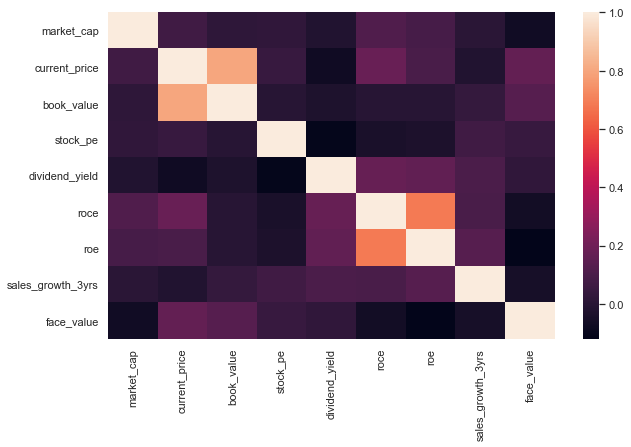

In [29]:
plt.figure(figsize=(10,6))
corr = companies_info.corr()
sns.heatmap(corr)

plt.show();

<Figure size 1512x1512 with 0 Axes>

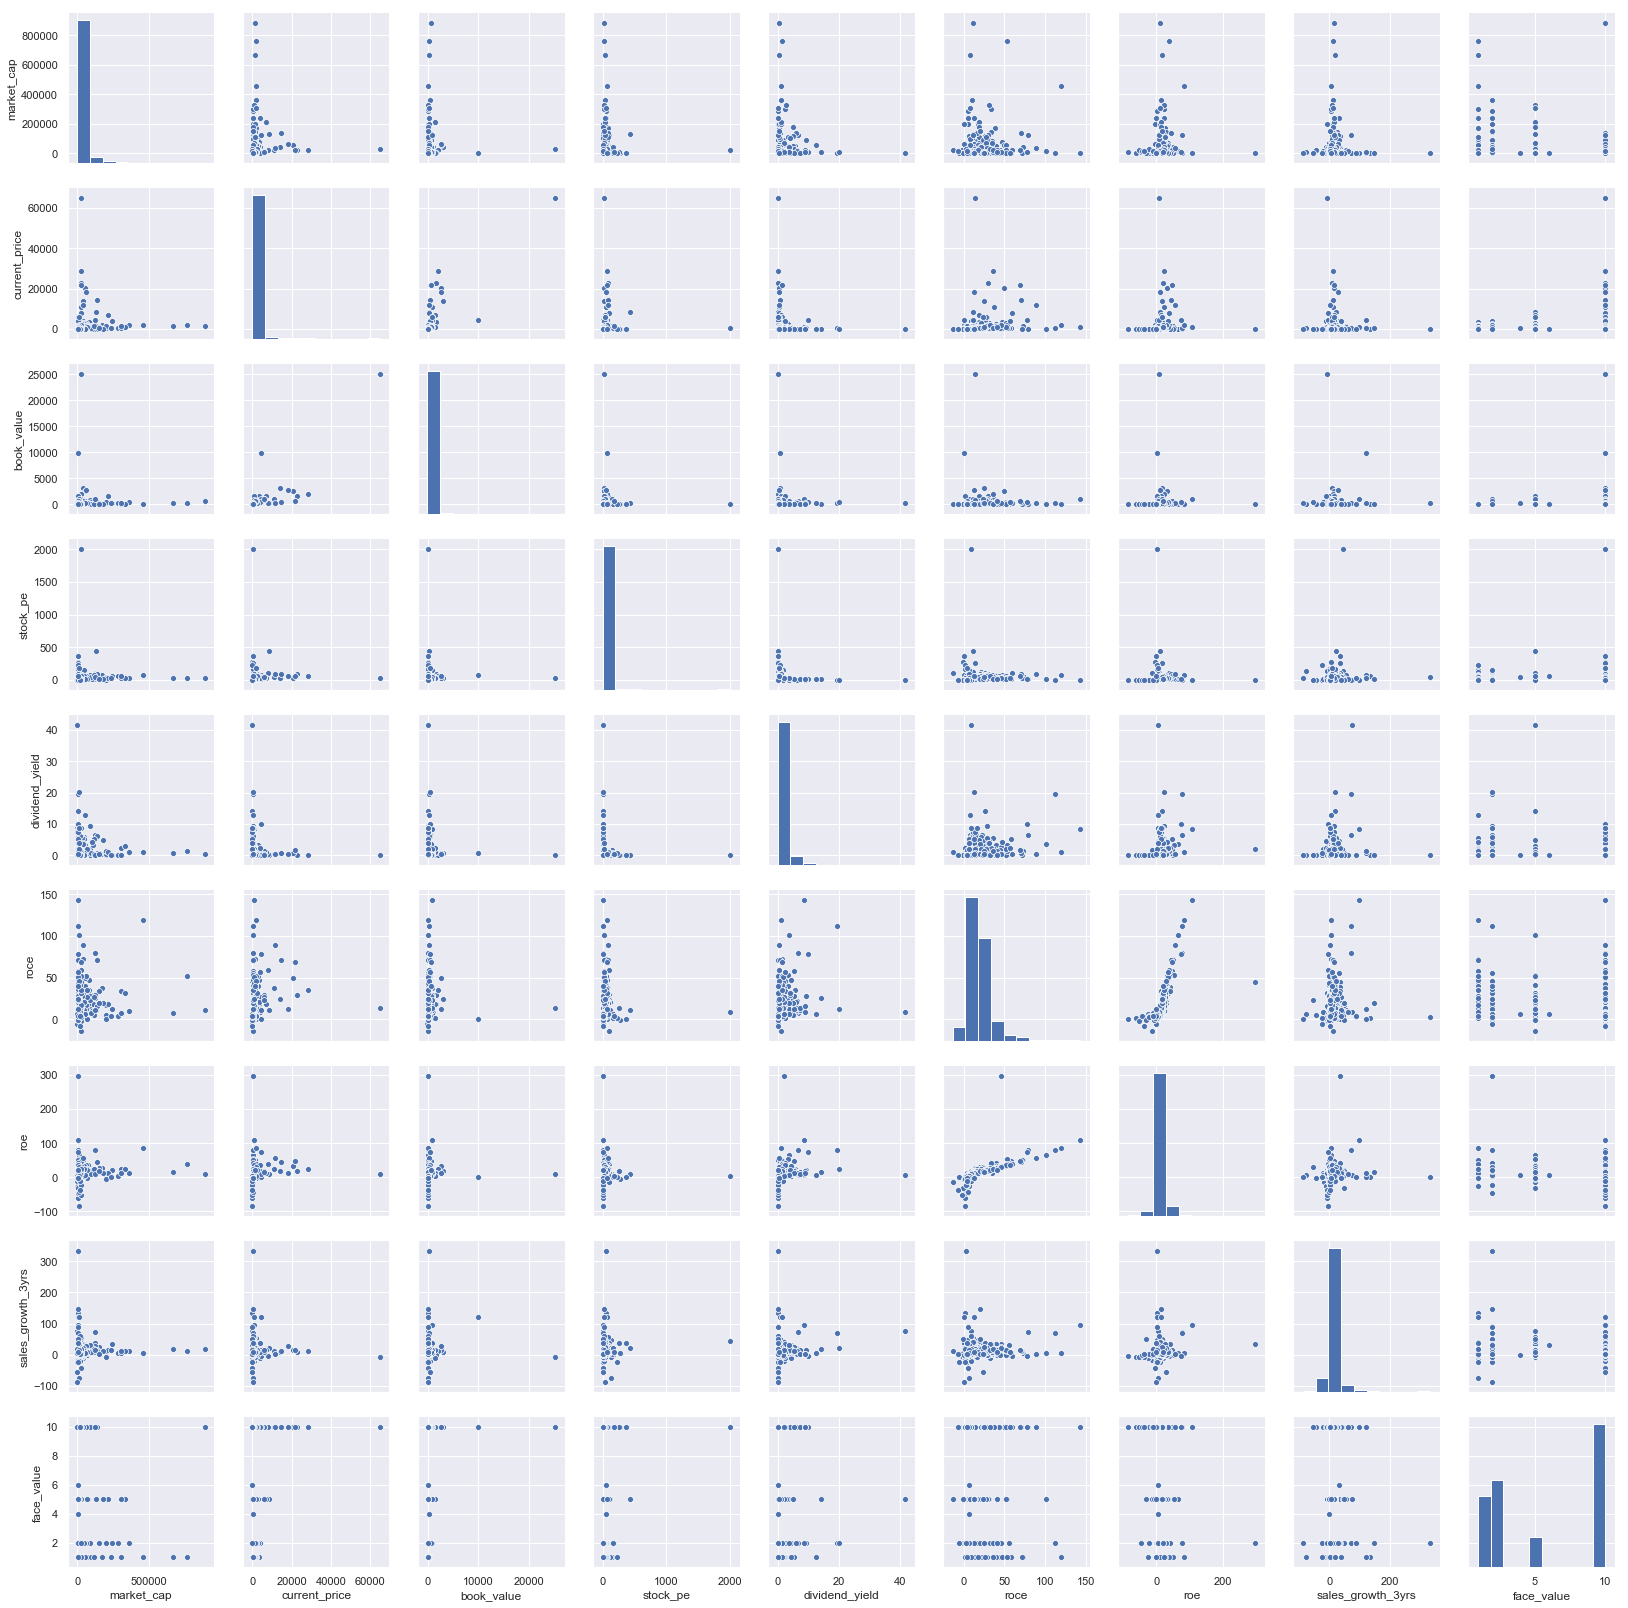

In [30]:
plt.figure(figsize=(21,21));
sns.pairplot(companies_info);

plt.show();

### Plots

#### Distribution plots

##### Market cap plot

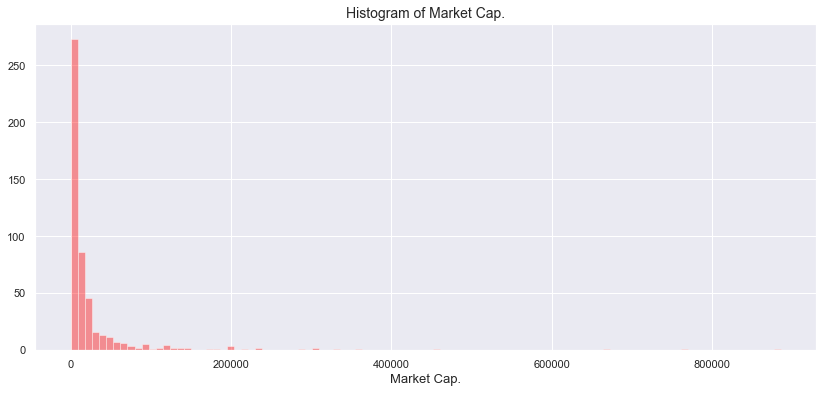

In [31]:
plt.figure(figsize=(14, 6))
sns.distplot(a=companies_info.market_cap, bins=100, kde=False, color='red')
plt.title('Histogram of Market Cap.', fontsize=14)
plt.xlabel('Market Cap.', fontsize=13)
plt.show();

- Most of companies in NSE 500 have market cap. less than 200k Cr.
- GDP of India 21,000 k Cr.

In [32]:
print('No. of companies having market cap greater than 200k Cr. : ')
companies_info.query('market_cap >=200000').shape[0]

No. of companies having market cap greater than 200k Cr. : 


13

##### Top 10 companies contribution to India's GDP

In [33]:
gdp_india = 21000000   # 21,000 k Cr
top_market_cap = companies_info.sort_values(by='market_cap', ascending=False).head(10)
top_market_cap['percentage_gdp'] = round(top_market_cap.market_cap*100/gdp_india, 0)
top_market_cap = top_market_cap.loc[:, ['symbol', 'market_cap', 'industry', 'percentage_gdp']]
top_market_cap

,symbol,market_cap,industry,percentage_gdp
373,RELIANCE,885262.0,ENERGY,4.0
426,TCS,762091.0,IT,4.0
179,HDFCBANK,667433.0,FINANCIAL SERVICES,3.0
195,HINDUNILVR,455444.0,CONSUMER GOODS,2.0
199,HDFC,360836.0,FINANCIAL SERVICES,2.0
231,INFY,328520.0,IT,2.0
272,KOTAKBANK,306474.0,FINANCIAL SERVICES,1.0
212,ITC,302063.0,CONSUMER GOODS,1.0
200,ICICIBANK,284632.0,FINANCIAL SERVICES,1.0
42,BAJFINANCE,238151.0,FINANCIAL SERVICES,1.0


- Top 10 companies contribute to 20% of GDP of India in terms of market cap.

In [34]:
companies_info.head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,METALS
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES
5,AAVAS,13236.0,1693.00,235.00,69.25,0.00,10.86,11.62,54.94,10.0,FINANCIAL SERVICES
6,ABBOTINDIA,23341.0,10984.00,945.22,48.14,0.59,37.36,24.00,12.06,10.0,PHARMA
7,ADANIGAS,16365.0,148.80,10.11,60.61,0.17,24.84,24.06,15.05,1.0,ENERGY
8,ADANIPORTS,83129.0,409.15,100.86,29.19,0.05,13.41,13.88,4.93,2.0,SERVICES
9,ADANIPOWER,24009.0,62.25,44.41,-1.00,0.00,5.11,-2.40,-42.63,10.0,ENERGY


#### Stock price

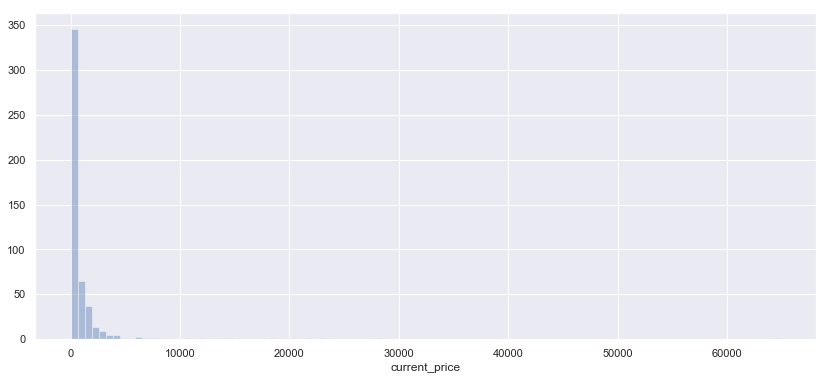

In [35]:
plt.figure(figsize=(14, 6))
sns.distplot(a=companies_info.current_price, kde=False, bins=100)
plt.show();

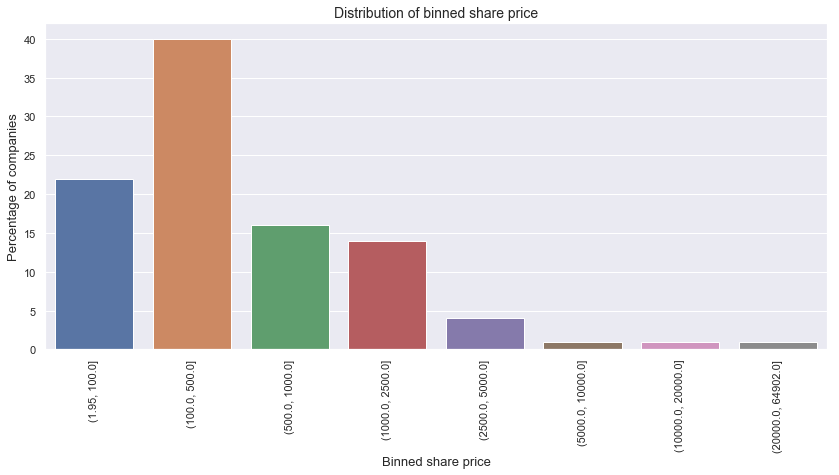

In [36]:
min_price = np.min(companies_info.current_price)
max_price = np.max(companies_info.current_price)
bins=[min_price, 100, 500, 1000, 2500, 5000, 10000, 20000, max_price]
companies_info['stock_price_bucket'] = pd.cut(companies_info.current_price, bins=bins)
# companies_info.stock_price_bucket.head()

stock_price_bin_cnt = companies_info.stock_price_bucket.value_counts(normalize=True).round(2)*100
# stock_price_bin_cnt

plt.figure(figsize=(14, 6))
sns.barplot(x=stock_price_bin_cnt.index, y=stock_price_bin_cnt.values)
plt.title('Distribution of binned share price', fontsize=14)
plt.xlabel('Binned share price', fontsize=13)
plt.ylabel('Percentage of companies', fontsize=13)
plt.xticks(rotation=90)
plt.show();

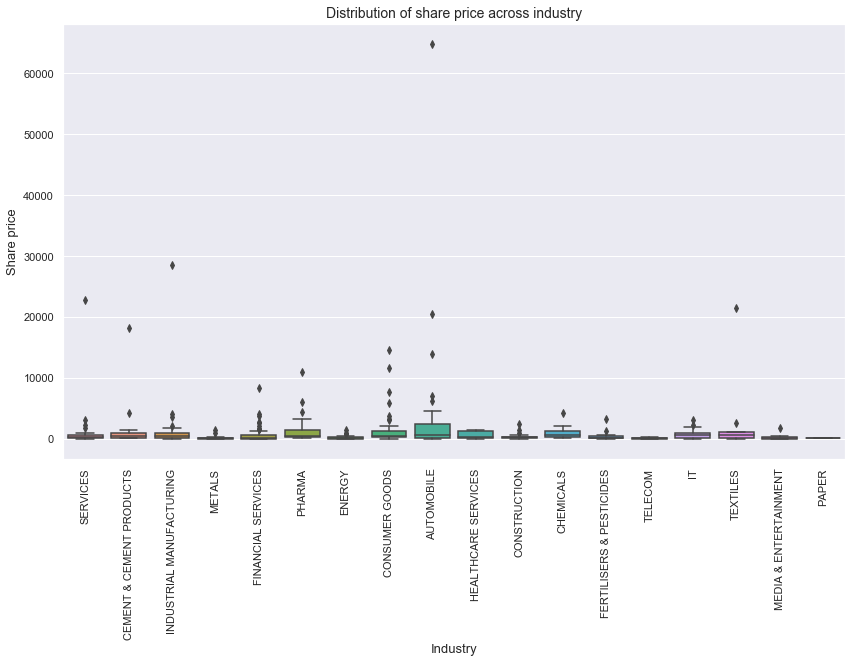

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='industry', y='current_price', data=companies_info, )  # showfliers=False
plt.title('Distribution of share price across industry', fontsize=14)
plt.xlabel('Industry', fontsize=13)
plt.ylabel('Share price', fontsize=13)

plt.xticks(rotation=90)
plt.show();

### No. of companies across industries

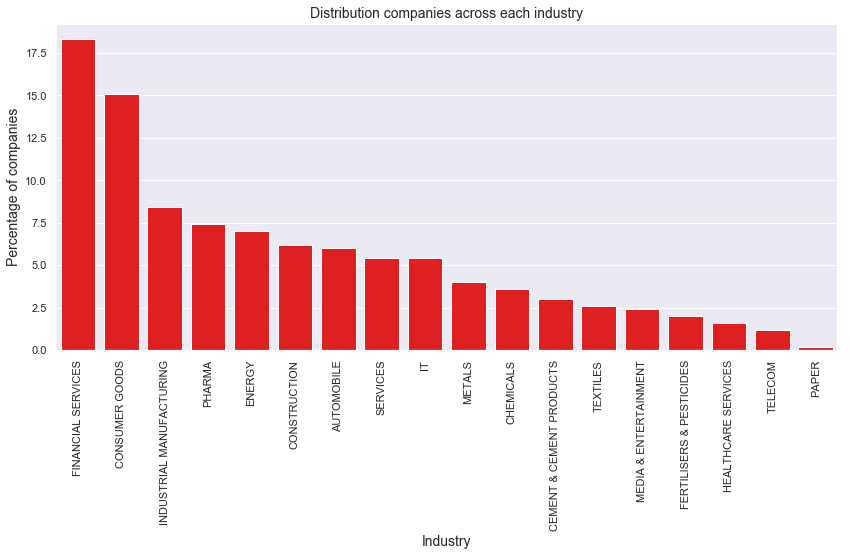

In [38]:
num_companies_industry = round(companies_info.industry.value_counts(normalize=True)*100,1)
# num_companies_industry

plt.figure(figsize=(14, 6))
sns.barplot(x=num_companies_industry.index, 
            y=num_companies_industry.values, color='red')
plt.title('Distribution companies across each industry', fontsize=14)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Percentage of companies', fontsize=14)
plt.xticks(rotation=90)
plt.show();

### Interesting companies

#### Market Cap: top companies

In [39]:
companies_info.sort_values(by=['market_cap'], ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
373,RELIANCE,885262.0,1397.00,639.40,25.02,0.47,11.45,9.78,16.89,10.0,ENERGY,"(1000.0, 2500.0]"
426,TCS,762091.0,2031.00,228.84,23.33,1.48,52.62,38.77,12.78,1.0,IT,"(1000.0, 2500.0]"
179,HDFCBANK,667433.0,1220.00,272.73,30.28,0.61,7.51,16.50,18.01,1.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
195,HINDUNILVR,455444.0,2104.00,36.23,67.86,1.04,119.00,84.04,7.16,1.0,CONSUMER GOODS,"(1000.0, 2500.0]"
199,HDFC,360836.0,2090.00,448.00,33.90,1.00,9.90,13.51,11.94,2.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
231,INFY,328520.0,769.50,136.97,22.32,2.85,31.30,23.09,10.64,5.0,IT,"(500.0, 1000.0]"
272,KOTAKBANK,306474.0,1605.00,224.60,58.93,0.05,7.21,12.07,13.48,5.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
212,ITC,302063.0,245.85,47.17,23.56,2.33,34.00,22.91,7.13,1.0,CONSUMER GOODS,"(100.0, 500.0]"
200,ICICIBANK,284632.0,440.60,167.74,52.80,0.23,4.52,3.15,6.33,2.0,FINANCIAL SERVICES,"(100.0, 500.0]"
42,BAJFINANCE,238151.0,4107.00,299.48,56.96,0.15,13.02,21.98,33.55,2.0,FINANCIAL SERVICES,"(2500.0, 5000.0]"


#### Highest share price

In [40]:
companies_info.sort_values(by='current_price', ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
287,MRF,27518.0,64902.0,25126.00,24.91,0.09,13.96,9.49,-7.31,10.0,AUTOMOBILE,"(20000.0, 64902.0]"
197,HONAUT,25220.0,28530.0,1977.00,66.16,0.16,35.44,22.66,13.22,10.0,INDUSTRIAL MANUFACTURING,"(20000.0, 64902.0]"
0,3MINDIA,25788.0,22882.0,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES,"(20000.0, 64902.0]"
341,PAGEIND,24034.0,21555.0,695.06,63.22,1.60,68.73,47.53,16.68,10.0,TEXTILES,"(20000.0, 64902.0]"
124,EICHERMOT,55922.0,20492.0,2611.00,28.35,0.61,49.88,33.10,16.55,10.0,AUTOMOBILE,"(20000.0, 64902.0]"
390,SHREECEM,63375.0,18190.0,2755.00,53.65,0.33,12.22,11.84,28.58,10.0,CEMENT & CEMENT PRODUCTS,"(10000.0, 20000.0]"
325,NESTLEIND,139971.0,14517.0,414.32,82.87,0.79,70.93,45.30,11.37,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"
69,BOSCHLTD,41275.0,13994.0,3094.00,27.47,0.75,24.63,16.72,8.11,10.0,AUTOMOBILE,"(10000.0, 20000.0]"
357,PGHH,37959.0,11694.0,280.05,90.57,0.34,89.10,56.85,1.71,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"
6,ABBOTINDIA,23341.0,10984.0,945.22,48.14,0.59,37.36,24.00,12.06,10.0,PHARMA,"(10000.0, 20000.0]"


#### Highest sales growth 

In [41]:
companies_info.sort_values(by='sales_growth_3yrs', ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
116,DCAL,2510.00,155.55,303.13,46.33,0.13,2.37,1.15,332.00,2.0,PHARMA,"(100.0, 500.0]"
435,TECHNOE,2914.00,264.95,127.67,17.52,0.00,19.55,13.82,148.00,2.0,CONSTRUCTION,"(100.0, 500.0]"
229,INFIBEAM,2734.00,41.20,39.17,58.19,0.00,1.95,1.14,133.00,1.0,IT,"(1.95, 100.0]"
307,MOTILALOFS,9441.00,640.25,175.89,29.17,1.31,12.99,13.00,122.00,1.0,FINANCIAL SERVICES,"(500.0, 1000.0]"
290,MAHSCOOTER,5254.00,4597.00,9907.00,72.51,0.72,0.75,0.74,120.00,10.0,AUTOMOBILE,"(2500.0, 5000.0]"
176,HEG,3617.00,937.25,963.58,1.44,8.54,143.00,109.00,96.44,10.0,INDUSTRIAL MANUFACTURING,"(500.0, 1000.0]"
219,IBREALEST,2014.00,44.30,143.88,25.86,0.00,4.57,1.49,88.86,2.0,CONSTRUCTION,"(1.95, 100.0]"
100,COX&KINGS,42.38,2.40,173.16,0.28,41.66,8.55,6.00,76.06,5.0,SERVICES,"(1.95, 100.0]"
94,COALINDIA,122885.00,199.40,22.71,11.72,6.57,79.28,78.45,72.76,10.0,METALS,"(100.0, 500.0]"
163,GRAPHITE,5529.00,282.95,238.13,2.54,19.44,112.00,78.30,71.03,2.0,INDUSTRIAL MANUFACTURING,"(100.0, 500.0]"


#### Top dividend paying companies

In [42]:
companies_info.sort_values(by=['dividend_yield'], ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
100,COX&KINGS,42.38,2.40,173.16,0.28,41.66,8.55,6.00,76.06,5.0,SERVICES,"(1.95, 100.0]"
217,IBULHSGFIN,8464.00,197.95,403.65,2.53,20.20,12.18,22.73,20.35,2.0,FINANCIAL SERVICES,"(100.0, 500.0]"
163,GRAPHITE,5529.00,282.95,238.13,2.54,19.44,112.00,78.30,71.03,2.0,INDUSTRIAL MANUFACTURING,"(100.0, 500.0]"
321,NATIONALUM,7537.00,40.40,56.20,6.35,14.23,25.99,16.51,19.04,5.0,METALS,"(1.95, 100.0]"
466,VEDL,55126.00,148.30,209.51,12.31,12.72,6.97,6.04,4.26,1.0,METALS,"(100.0, 500.0]"
356,PGHL,7373.00,4441.00,448.07,8.65,9.91,78.16,73.25,-3.32,10.0,PHARMA,"(2500.0, 5000.0]"
196,HINDZINC,89387.00,211.55,79.53,11.46,9.45,28.32,22.10,14.20,2.0,METALS,"(100.0, 500.0]"
380,SJVN,9510.00,24.20,28.60,6.20,8.88,15.96,12.84,2.12,10.0,ENERGY,"(1.95, 100.0]"
360,RECLTD,24588.00,124.50,173.69,4.24,8.84,9.21,17.31,2.15,10.0,FINANCIAL SERVICES,"(100.0, 500.0]"
246,JISLJALEQS,598.79,11.70,92.25,2.89,8.61,10.44,5.05,1.32,2.0,INDUSTRIAL MANUFACTURING,"(1.95, 100.0]"


#### Top dividen paying industries

In [46]:
companies_info.groupby(by='industry').agg({'dividend_yield': ['mean', 'median', 'max', 'min']                                                })

dividend_yield                    
                                   mean median    max   min
industry                                                   
AUTOMOBILE                     1.170667  0.935   4.22  0.00
CEMENT & CEMENT PRODUCTS       0.741333  0.720   2.16  0.00
CHEMICALS                      1.163333  0.640   3.55  0.20
CONSTRUCTION                   1.230000  0.540   5.86  0.00
CONSUMER GOODS                 0.673733  0.420   5.34  0.00
ENERGY                         2.744000  2.050   8.88  0.00
FERTILISERS & PESTICIDES       1.983000  1.520   7.44  0.30
FINANCIAL SERVICES             1.294505  0.530  20.20  0.00
HEALTHCARE SERVICES            0.786250  0.415   3.99  0.00
INDUSTRIAL MANUFACTURING       2.037381  1.000  19.44  0.00
IT                             1.569630  1.330   4.51  0.00
MEDIA & ENTERTAINMENT          1.574167  0.415   6.40  0.00
METALS                         3.621500  1.990  14.23  0.00
PAPER                          2.890000  2.890   2.89  2.89
PHARMA                         0.964865  0.700   9.91  0.00
SERVICES                       2.593704  0.440  41.66  0.00
TELECOM                        1.561667  0.530   5.84  0.00
TEXTILES                       1.302308  0.530   5.28  0.00

#### Top ROCE

In [44]:
companies_info.sort_values(by='roce', ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
176,HEG,3617.0,937.25,963.58,1.44,8.54,143.00,109.00,96.44,10.0,INDUSTRIAL MANUFACTURING,"(500.0, 1000.0]"
195,HINDUNILVR,455444.0,2104.00,36.23,67.86,1.04,119.00,84.04,7.16,1.0,CONSUMER GOODS,"(1000.0, 2500.0]"
163,GRAPHITE,5529.0,282.95,238.13,2.54,19.44,112.00,78.30,71.03,2.0,INDUSTRIAL MANUFACTURING,"(100.0, 500.0]"
83,CASTROLIND,13096.0,132.40,12.21,17.94,3.78,101.00,64.81,5.79,5.0,ENERGY,"(100.0, 500.0]"
357,PGHH,37959.0,11694.00,280.05,90.57,0.34,89.10,56.85,1.71,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"
94,COALINDIA,122885.0,199.40,22.71,11.72,6.57,79.28,78.45,72.76,10.0,METALS,"(100.0, 500.0]"
356,PGHL,7373.0,4441.00,448.07,8.65,9.91,78.16,73.25,-3.32,10.0,PHARMA,"(2500.0, 5000.0]"
96,COLPAL,41625.0,1530.00,53.19,54.94,1.50,72.97,50.87,4.88,1.0,CONSUMER GOODS,"(1000.0, 2500.0]"
222,IEX,4057.0,135.45,12.36,24.93,0.09,71.10,50.47,13.64,1.0,FINANCIAL SERVICES,"(100.0, 500.0]"
325,NESTLEIND,139971.0,14517.00,414.32,82.87,0.79,70.93,45.30,11.37,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"


In [47]:
companies_info.query('industry=="IT"')

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
64,BSOFT,1790.00,64.75,42.83,12.93,3.06,13.37,11.86,-7.40,2.0,IT,"(1.95, 100.0]"
104,CYIENT,4923.00,447.65,202.42,13.43,3.36,25.24,20.51,9.04,5.0,IT,"(100.0, 500.0]"
140,FSL,3363.00,48.50,32.87,16.78,4.11,10.03,8.93,-4.25,10.0,IT,"(1.95, 100.0]"
177,HCLTECH,148281.00,1093.00,224.38,18.55,0.73,33.82,27.90,24.64,2.0,IT,"(1000.0, 2500.0]"
187,HEXAWARE,11031.00,369.75,61.49,23.00,2.29,33.74,27.63,11.52,2.0,IT,"(100.0, 500.0]"
218,IBULISL,659.67,73.85,183.28,34.02,0.00,0.34,0.38,-86.91,2.0,IT,"(1.95, 100.0]"
229,INFIBEAM,2734.00,41.20,39.17,58.19,0.00,1.95,1.14,133.00,1.0,IT,"(1.95, 100.0]"
230,NAUKRI,27958.00,2286.00,189.99,90.77,0.26,19.72,13.76,15.24,10.0,IT,"(1000.0, 2500.0]"
231,INFY,328520.00,769.50,136.97,22.32,2.85,31.30,23.09,10.64,5.0,IT,"(500.0, 1000.0]"
233,INTELLECT,2479.00,187.55,70.36,31.74,0.00,17.00,16.79,19.47,5.0,IT,"(100.0, 500.0]"


### Clustering

In [48]:
companies_info_back = companies_info.copy()

In [ ]:
# run this if you make any mistake
# companies_info = companies_info_back.copy()

In [49]:
companies_info.head()
companies_info.isna().sum()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES,"(20000.0, 64902.0]"
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS,"(1000.0, 2500.0]"
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING,"(1000.0, 2500.0]"
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,METALS,"(1000.0, 2500.0]"
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES,"(500.0, 1000.0]"


symbol                0
market_cap            0
current_price         0
book_value            0
stock_pe              0
dividend_yield        0
roce                  0
roe                   0
sales_growth_3yrs     0
face_value            0
industry              0
stock_price_bucket    1
dtype: int64

In [50]:
companies_info.isna().sum()

symbol                0
market_cap            0
current_price         0
book_value            0
stock_pe              0
dividend_yield        0
roce                  0
roe                   0
sales_growth_3yrs     0
face_value            0
industry              0
stock_price_bucket    1
dtype: int64

In [52]:
companies_info.stock_pe.value_counts().head()
companies_info.sales_growth_3yrs.value_counts().head()

-1.00     32
 22.32     3
 26.18     2
 16.28     2
 9.12      2
Name: stock_pe, dtype: int64

0.00     12
11.18     3
13.98     3
7.45      3
4.80      3
Name: sales_growth_3yrs, dtype: int64

In [53]:
companies_info.dtypes

symbol                  object
market_cap             float64
current_price          float64
book_value             float64
stock_pe               float64
dividend_yield         float64
roce                   float64
roe                    float64
sales_growth_3yrs      float64
face_value             float64
industry                object
stock_price_bucket    category
dtype: object

#### Standardise column

In [70]:
df = companies_info.select_dtypes(include=['object', 'float'])
df.head()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,METALS
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES


In [57]:
df_numeric = companies_info.select_dtypes(include=['float'])
df_numeric.head()

,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0
1,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0
2,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0
3,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0
4,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0


In [58]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_numeric)

# scaling the features before applying the k-Means algorithm
df_std = pd.DataFrame(df_std, columns=df_numeric.columns)
df_std.head()
df_std.describe()

,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,0.029084,0.352543,0.066160,0.042198,0.000000,0.273794,0.273338,0.230121,1.000000
1,0.032517,0.023622,0.023774,0.008395,0.021843,0.188951,0.263232,0.226875,1.000000
2,0.018285,0.026488,0.013922,0.021097,0.012482,0.199094,0.255939,0.245566,0.111111
3,0.003810,0.021665,0.017056,0.014691,0.023524,0.191822,0.258049,0.269008,1.000000
4,0.021430,0.009952,0.003235,0.019636,0.002880,0.144999,0.262086,0.305722,1.000000


,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.031712,0.017451,0.011558,0.019275,0.036150,0.209350,0.261196,0.239041,0.500669
std,0.086358,0.060146,0.049263,0.048487,0.068144,0.103809,0.052187,0.056405,0.448741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003727,0.001798,0.002781,0.006654,0.005521,0.141841,0.243358,0.217654,0.111111
50%,0.008098,0.004906,0.004956,0.011869,0.017523,0.191758,0.260497,0.232568,0.444444
75%,0.022366,0.012426,0.009457,0.022417,0.041647,0.247097,0.275624,0.249678,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Elbow plot

In [59]:
# utility function to get the optimal number of clusters
# kmeans clustering
def plot_sse_kmeans(input_data):
    sse = {}
    for k in range(1, 8):
        kmeans = KMeans(n_clusters=k, max_iter=1000, n_jobs=-2, init='k-means++').fit(input_data)
#         input_data["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("Within-cluster SSE (WSSE)")
    plt.show()

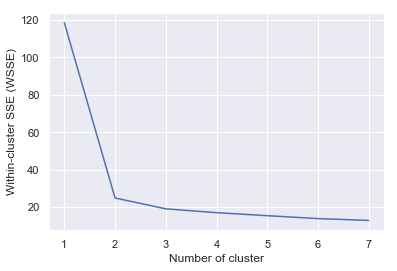

In [60]:
plot_sse_kmeans(df_std)

#### Fit k-means

In [61]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', 
                n_jobs=-2, verbose=1, 
                random_state=123)
kmeans.fit(df_std)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 18.288103807552815
start iteration
done sorting
end inner loop
Iteration 1, inertia 17.97357313803824
start iteration
done sorting
end inner loop
Iteration 2, inertia 17.806511454126827
start iteration
done sorting
end inner loop
Iteration 3, inertia 17.72448681643238
start iteration
done sorting
end inner loop
Iteration 4, inertia 17.682875891926823
start iteration
done sorting
end inner loop
Iteration 5, inertia 17.65492182024704
start iteration
done sorting
end inner loop
Iteration 6, inertia 17.609501987513703
start iteration
done sorting
end inner loop
Iteration 7, inertia 17.597495018084054
start iteration
done sorting
end inner loop
Iteration 8, inertia 17.578549722048265
start iteration
done sorting
end inner loop
Iteration 9, inertia 17.559865237131472
start iteration
done sorting
end inner loop
Iteration 10, inertia 17.55570176892755
start iteration
done sorting
end inner loop
Iteration 1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-2, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=1)

#### Cluster distribution

In [71]:
kmeans_cluster = kmeans.predict(df_std)
len(kmeans_cluster)
type(kmeans_cluster)

cluster_distribution = pd.Series(kmeans_cluster).value_counts()
cluster_distribution

498

numpy.ndarray

1    237
0    202
2     47
3     12
dtype: int64

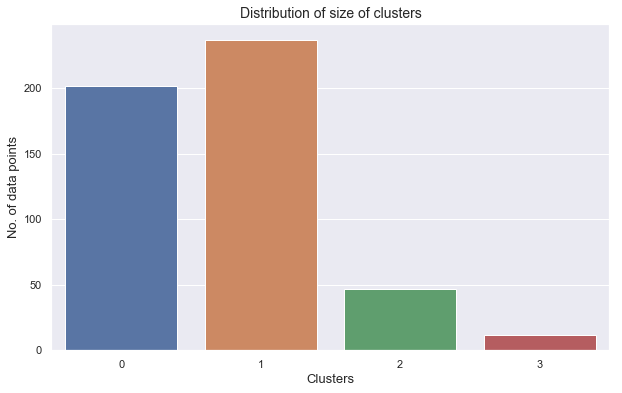

In [72]:
plt.figure(figsize=((10,6)))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values)
plt.title('Distribution of size of clusters', fontsize=14)
plt.xlabel('Clusters',  fontsize=13)
plt.ylabel('No. of data points', fontsize=13)
plt.show();

In [73]:
df.head()
df.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,METALS
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES


(498, 11)

In [74]:
company_clusters = df.copy()
company_clusters['cluster'] = kmeans_cluster
company_clusters.head()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,cluster
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES,3
1,ACC,28827.0,1535.00,584.47,15.84,0.91,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS,0
2,AIAENG,16229.0,1721.00,336.80,41.32,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING,1
3,APLAPOLLO,3415.0,1408.00,415.57,28.47,0.98,16.31,13.15,25.78,10.0,METALS,0
4,AUBANK,19013.0,647.85,68.13,38.39,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES,0


### Cluster characteristics

In [78]:
cluster_gdf = company_clusters.groupby(by='cluster').mean().round(0)
cluster_gdf

,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
cluster,,,,,,,,,
0,20371.0,968.0,315.0,42.0,1.0,15.0,10.0,11.0,10.0
1,31137.0,476.0,122.0,33.0,1.0,20.0,17.0,14.0,2.0
2,42665.0,1165.0,226.0,41.0,2.0,20.0,14.0,15.0,5.0
3,41793.0,16811.0,2905.0,49.0,3.0,64.0,47.0,19.0,10.0


In [79]:
cluster3 = company_clusters.query('cluster==3')

In [80]:
cluster3

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,cluster
0,3MINDIA,25788.0,22882.00,1650.00,83.65,0.00,29.16,19.02,9.49,10.0,SERVICES,3
94,COALINDIA,122885.0,199.40,22.71,11.72,6.57,79.28,78.45,72.76,10.0,METALS,3
124,EICHERMOT,55922.0,20492.00,2611.00,28.35,0.61,49.88,33.10,16.55,10.0,AUTOMOBILE,3
154,GILLETTE,25354.0,7780.00,238.83,100.24,0.30,59.81,38.92,-3.73,10.0,CONSUMER GOODS,3
176,HEG,3617.0,937.25,963.58,1.44,8.54,143.00,109.00,96.44,10.0,INDUSTRIAL MANUFACTURING,3
197,HONAUT,25220.0,28530.00,1977.00,66.16,0.16,35.44,22.66,13.22,10.0,INDUSTRIAL MANUFACTURING,3
287,MRF,27518.0,64902.00,25126.00,24.91,0.09,13.96,9.49,-7.31,10.0,AUTOMOBILE,3
325,NESTLEIND,139971.0,14517.00,414.32,82.87,0.79,70.93,45.30,11.37,10.0,CONSUMER GOODS,3
341,PAGEIND,24034.0,21555.00,695.06,63.22,1.60,68.73,47.53,16.68,10.0,TEXTILES,3
356,PGHL,7373.0,4441.00,448.07,8.65,9.91,78.16,73.25,-3.32,10.0,PHARMA,3


In [83]:
cluster2 = company_clusters.query('cluster==2')

In [84]:
cluster2

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,cluster
23,APOLLOHOSP,20691.00,1487.00,279.14,64.28,0.40,10.64,8.06,14.71,5.0,HEALTHCARE SERVICES,2
25,ARVINDFASN,2563.00,436.85,230.04,47.33,0.00,5.97,4.78,0.00,4.0,CONSUMER GOODS,2
27,ASHOKA,2799.00,99.70,78.80,9.02,0.00,21.74,15.24,25.39,5.0,CONSTRUCTION,2
43,BAJAJFINSV,132349.00,8317.00,198.63,438.87,0.03,10.79,10.17,21.59,5.0,FINANCIAL SERVICES,2
52,BATAINDIA,22452.00,1747.00,135.89,64.55,0.36,30.67,20.52,6.63,5.0,CONSUMER GOODS,2
60,BHARTIARTL,198017.00,385.85,191.66,-1.00,0.50,0.01,-4.42,-6.30,5.0,TELECOM,2
62,BIOCON,30966.00,258.05,59.30,110.06,0.19,4.82,4.79,7.81,5.0,PHARMA,2
83,CASTROLIND,13096.00,132.40,12.21,17.94,3.78,101.00,64.81,5.79,5.0,ENERGY,2
88,CERA,3196.00,2457.00,538.34,28.12,0.53,27.16,17.59,13.57,5.0,CONSTRUCTION,2
97,CONCOR,36521.00,599.40,170.16,30.67,1.43,16.50,12.29,5.14,5.0,SERVICES,2
